In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
def continuous_col(data):
    """ Identifies continuous columns in a DataFrame.
    Args:
        data (pd.DataFrame): The input DataFrame to check for continuous columns.
    Returns:
        list: A list of column names that are continuous (i.e., have more than two unique values).
    Raises:
        ValueError: If the input data is not a pandas DataFrame.
    """
    continuous_cols=[col for col in data.columns if data[col].nunique() > 2]
    return continuous_cols
    

In [27]:
def binary_col(data):
    """Identifies binary columns in a DataFrame.
    Args:
        data (pd.DataFrame): The input DataFrame to check for binary columns.
        Returns:
        list: A list of column names that are binary (i.e., have exactly two unique values).
        Raises:
            ValueError: If the input data is not a pandas DataFrame.


    """
    binary_cols=[col for col in data.columns if data[col].nunique() == 2]
    return binary_cols

In [28]:
# List of your result files
model_files = {
    "Logistic Regression": "Results\LR_model_results.json",
    "Random Forest": "Results\RF_model_results.json",
    "XGBoost": "Results\XGB_model_results.json",
    "SOM + Random Forest": "Results\SOM_RF_model_results.json",
    "SOM + XGBoost": "Results\SOM_XGB_model_results.json",
    "K-Means + Random Forest": "Results\K-Means_RF_model_results.json",
    "K-Means + XGBoost": "Results\K-Means_XGB_model_results.json"
}

<>:3: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:5: SyntaxWarning: invalid escape sequence '\X'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\K'
<>:9: SyntaxWarning: invalid escape sequence '\K'
<>:3: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:5: SyntaxWarning: invalid escape sequence '\X'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\K'
<>:9: SyntaxWarning: invalid escape sequence '\K'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\2465236285.py:3: SyntaxWarning: invalid escape sequence '\L'
  "Logistic Regression": "Results\LR_model_results.json",
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\2465236285.py:4: SyntaxWarning: invalid escape sequence '\R'
  "Random Forest":

In [29]:
data_scaled = pd.read_csv('Tables/bnpl_scaled.csv', index_col=0)


<>:10: SyntaxWarning: invalid escape sequence '\H'
<>:10: SyntaxWarning: invalid escape sequence '\H'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\3206469827.py:10: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig('Plots\Histograms\\{column}_histogram.png')


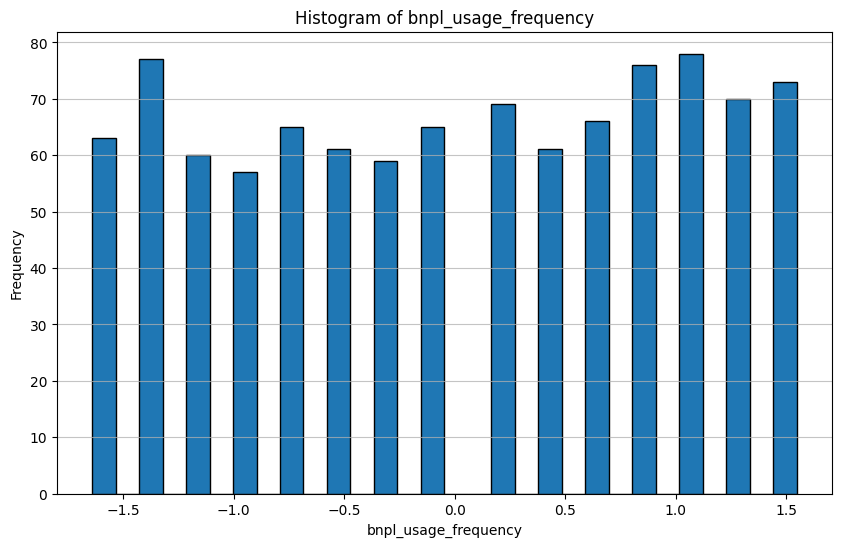

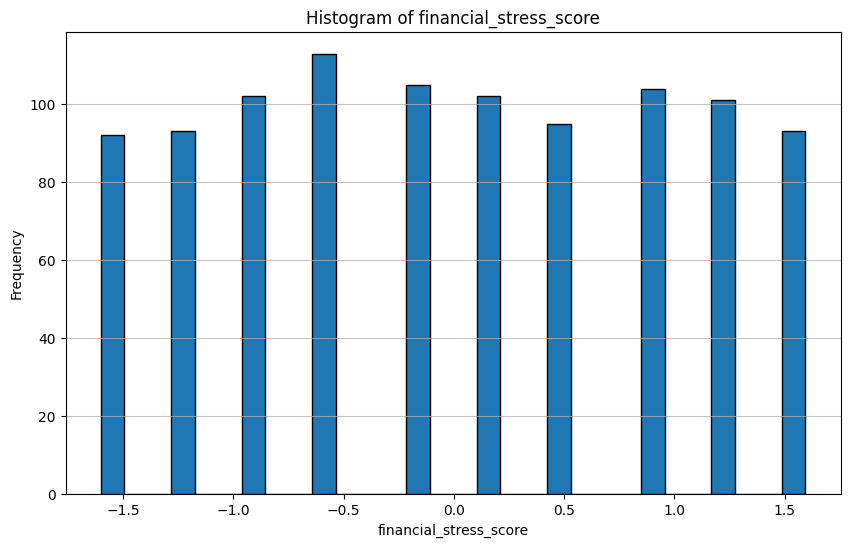

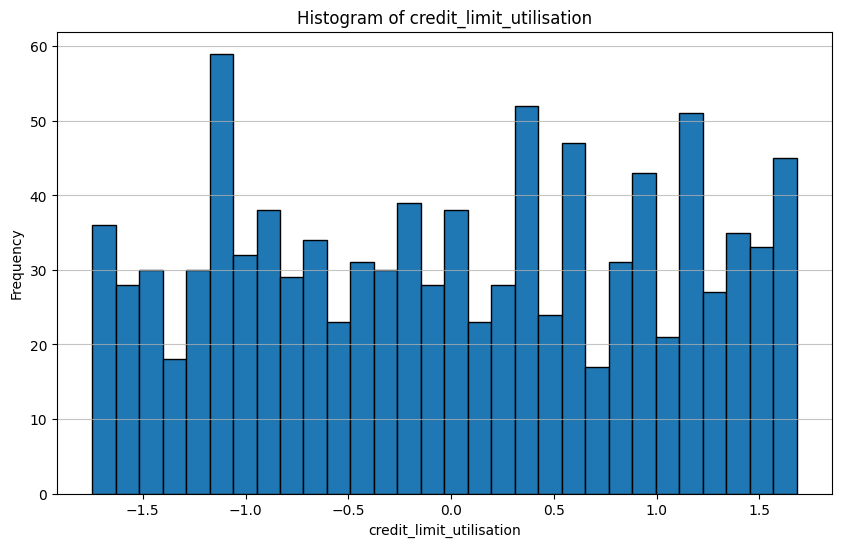

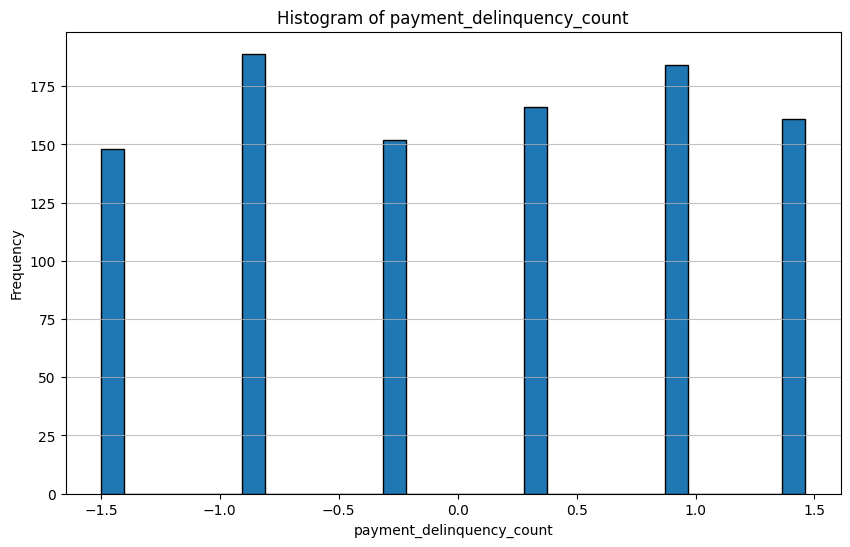

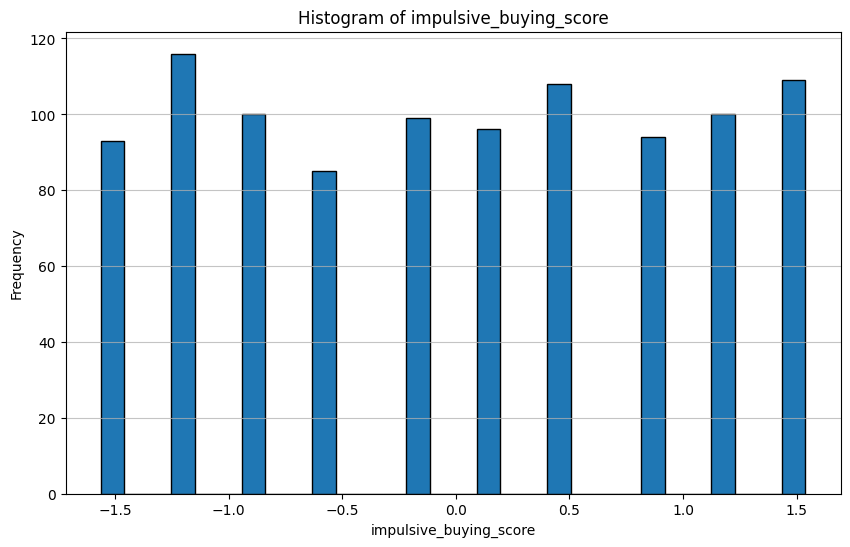

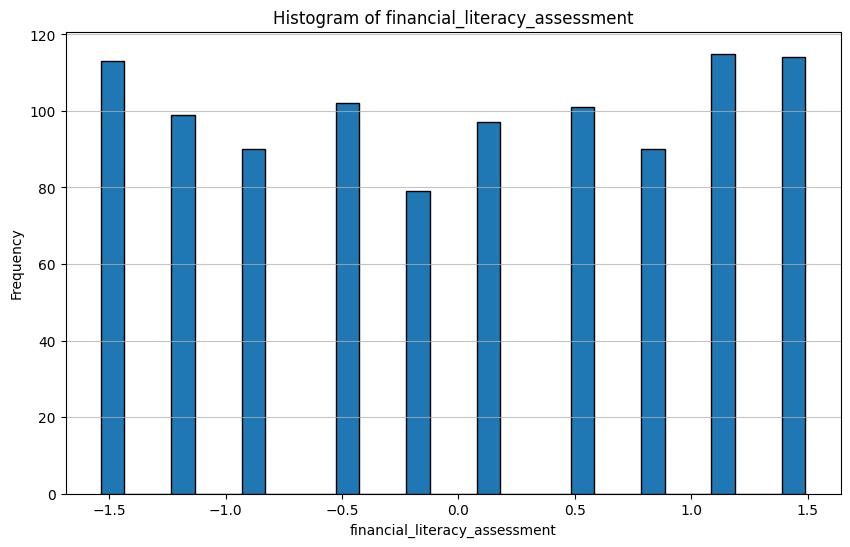

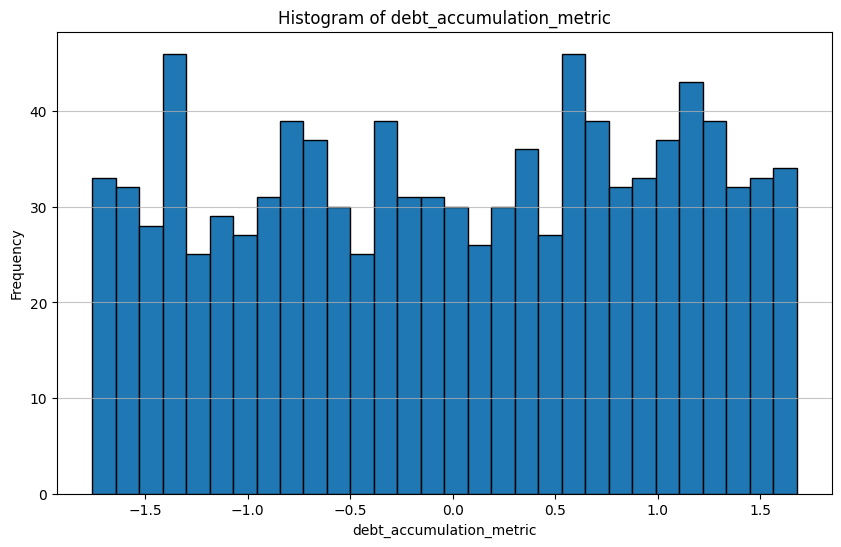

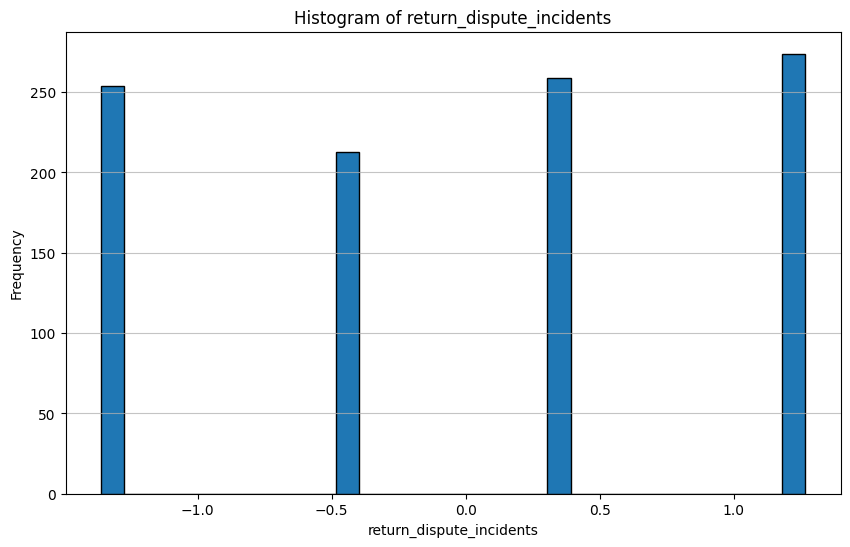

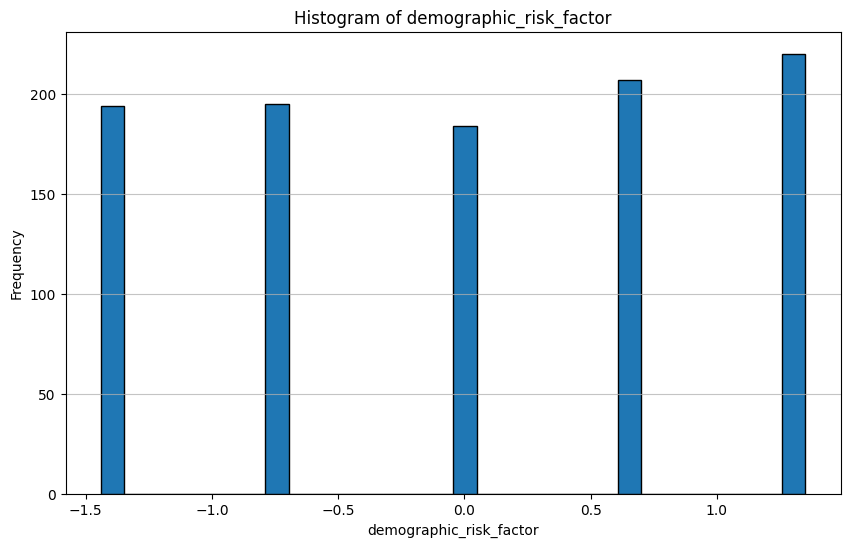

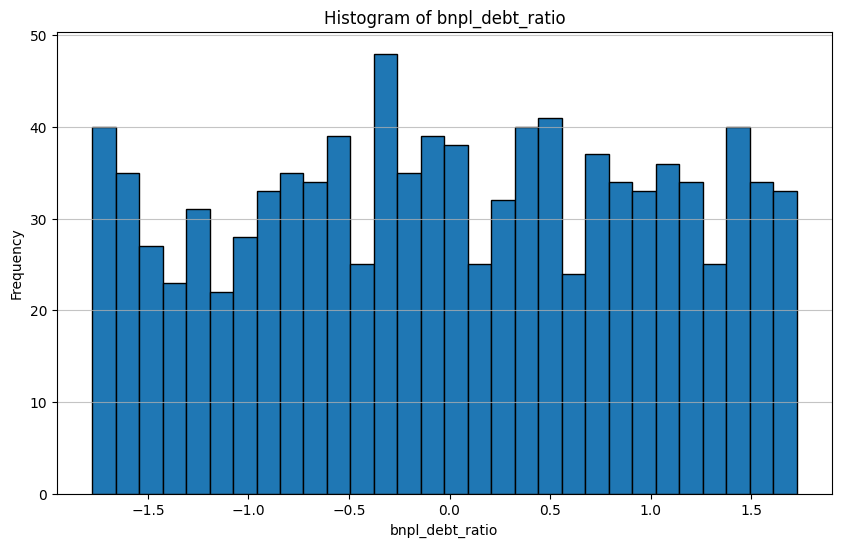

In [30]:
# Plotting histograms for continuous columns
continuous_cols = continuous_col(data_scaled)
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(data_scaled[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Histograms\\{column}_histogram.png')
    plt.show()
    plt.close()

<>:8: SyntaxWarning: invalid escape sequence '\B'
<>:8: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\351936024.py:8: SyntaxWarning: invalid escape sequence '\B'
  plt.savefig('Plots\Boxplots\\{column}boxplots.png')


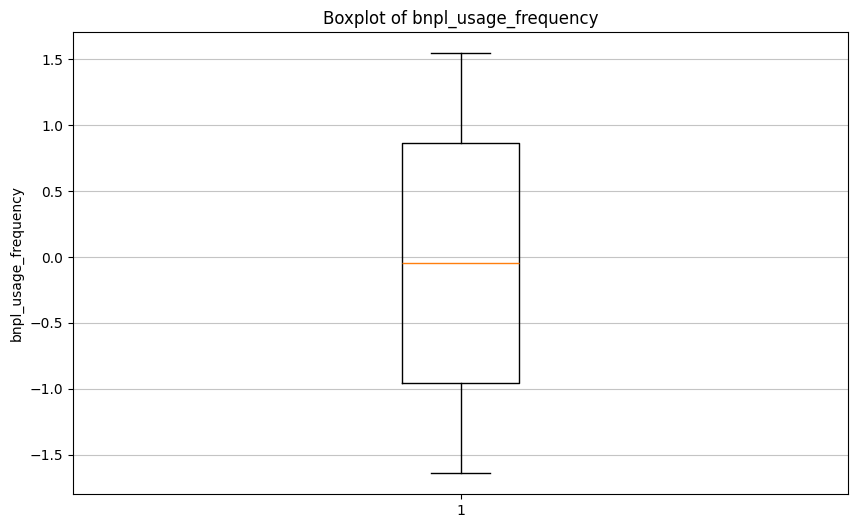

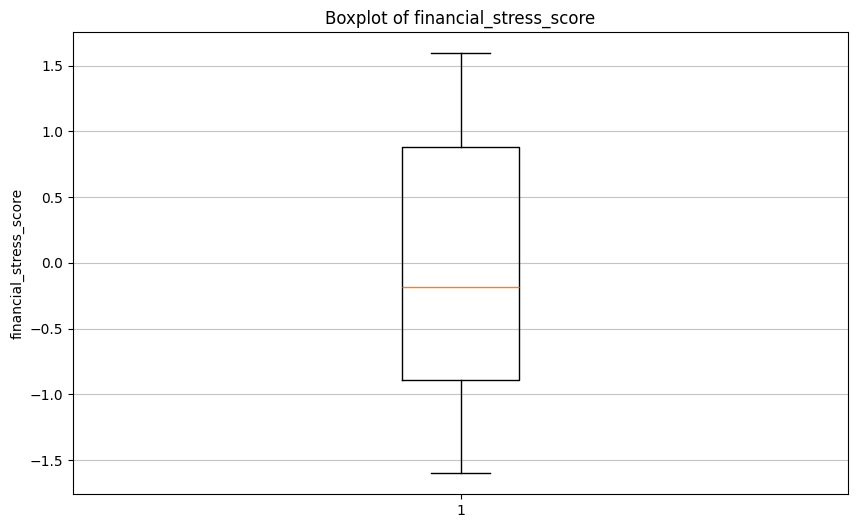

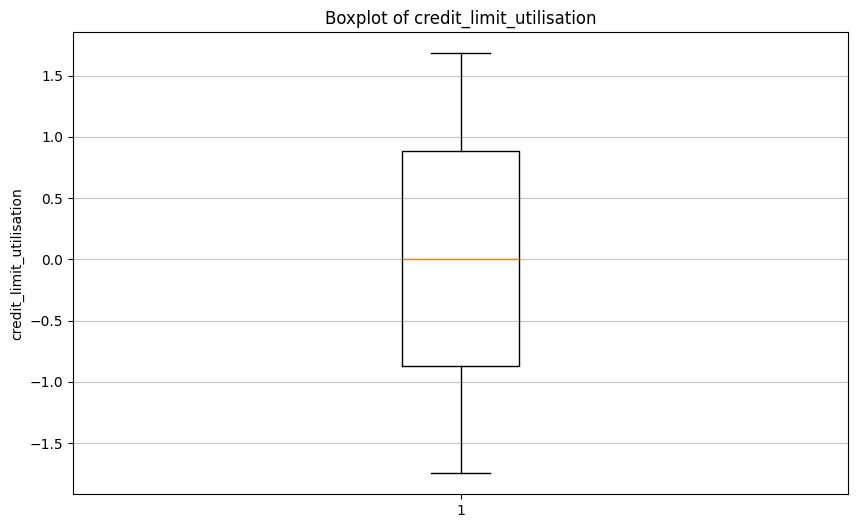

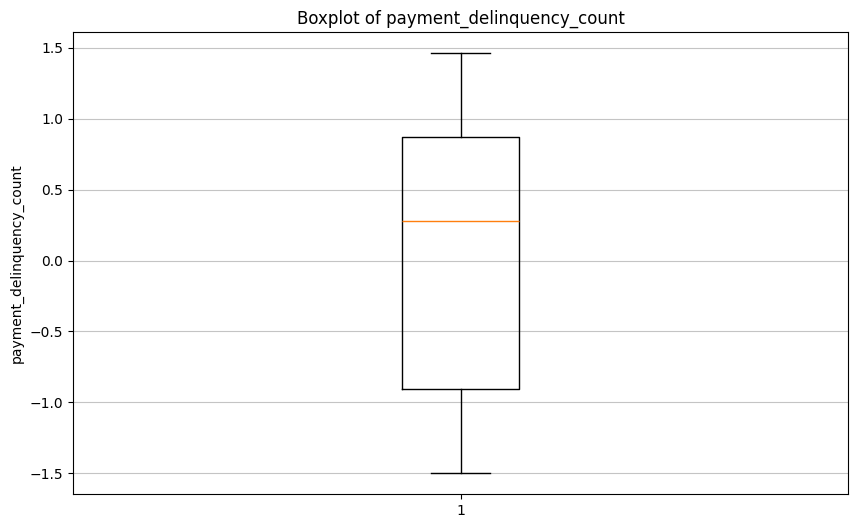

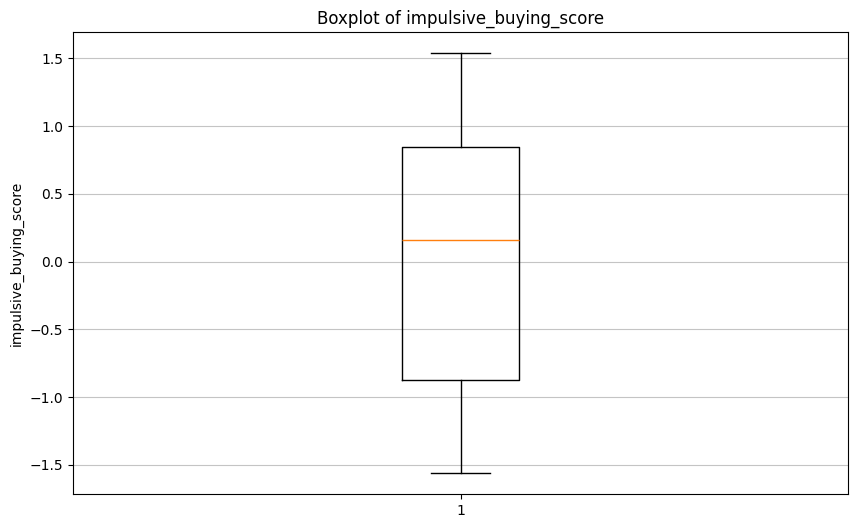

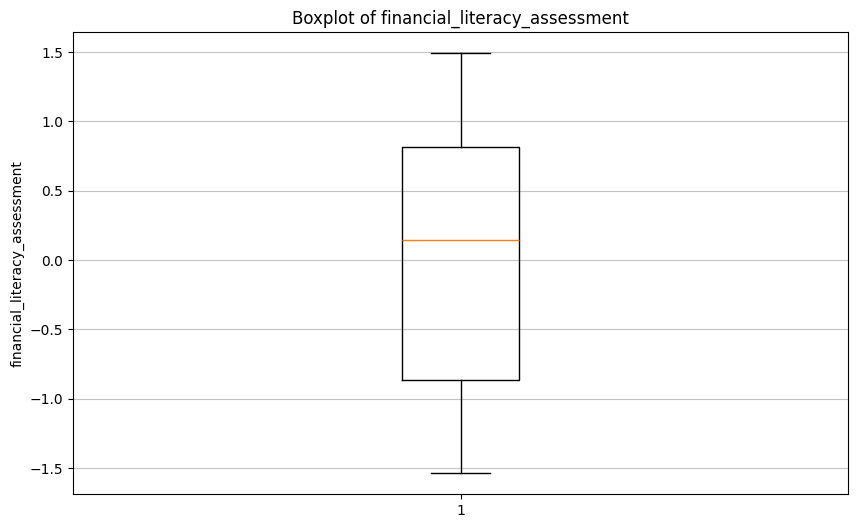

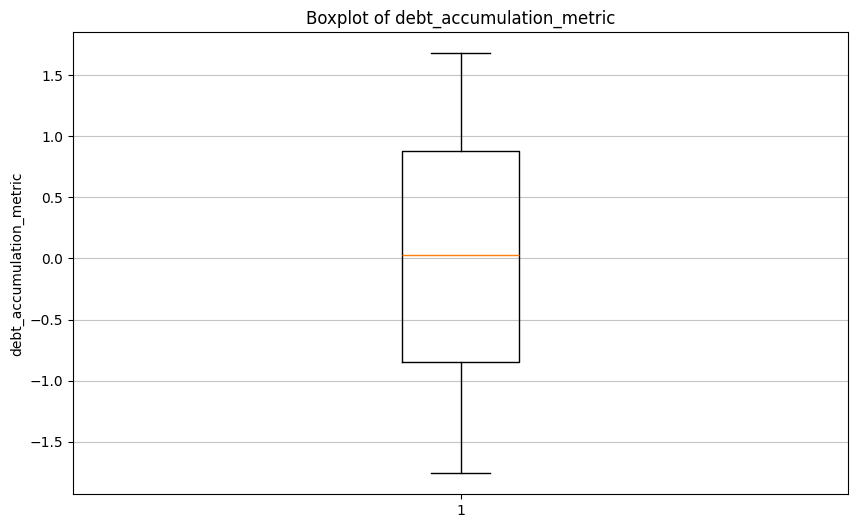

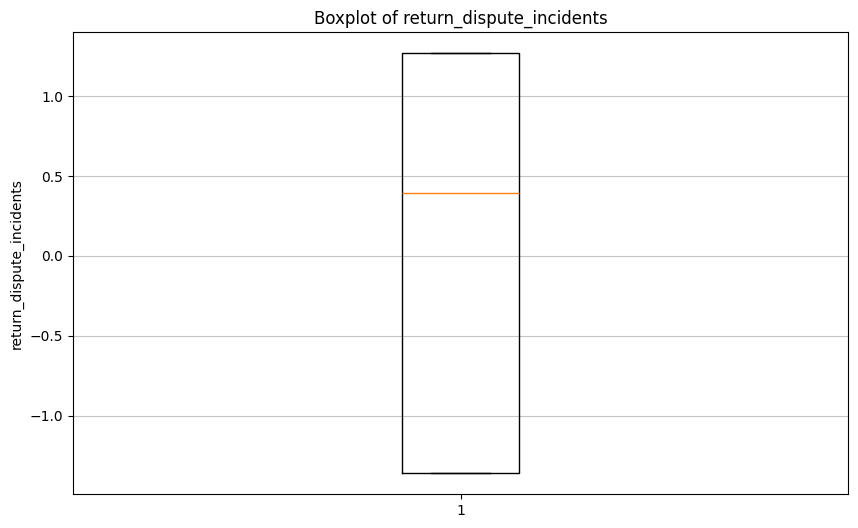

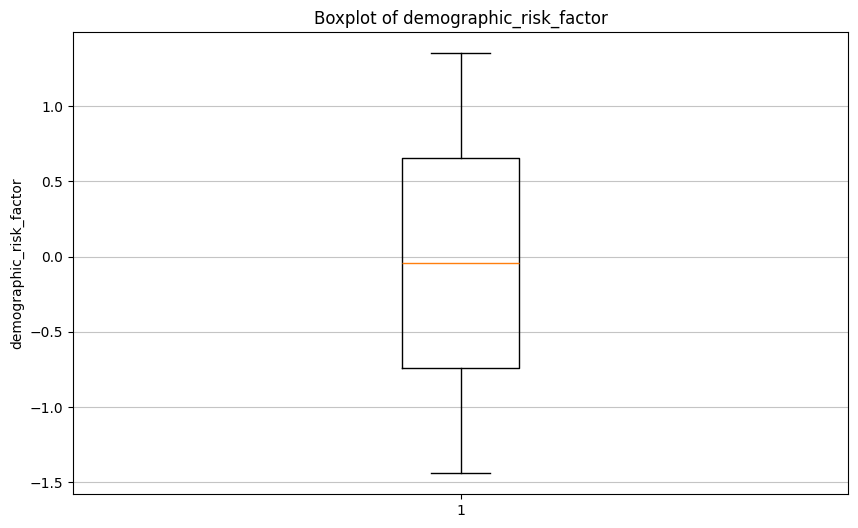

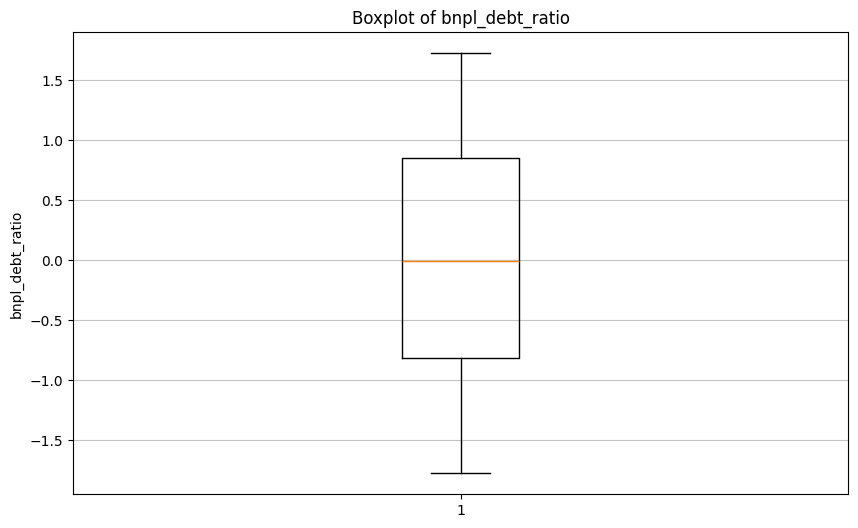

In [31]:
#print boxplots for continuous columns
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_scaled[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Boxplots\\{column}boxplots.png')
    plt.show()
    plt.close()

<>:12: SyntaxWarning: invalid escape sequence '\B'
<>:12: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\3642219838.py:12: SyntaxWarning: invalid escape sequence '\B'
  plt.savefig('Plots\Balances\\{column}balance.png')


Balance of over_indebtedness_flag:
 over_indebtedness_flag
0    0.637
1    0.363
Name: proportion, dtype: float64
Balance of external_repayment_loans:
 external_repayment_loans
0    0.598
1    0.402
Name: proportion, dtype: float64
Balance of credit_card_interest_incidence:
 credit_card_interest_incidence
0    0.656
1    0.344
Name: proportion, dtype: float64
Balance of default_flag:
 default_flag
0    0.915
1    0.085
Name: proportion, dtype: float64


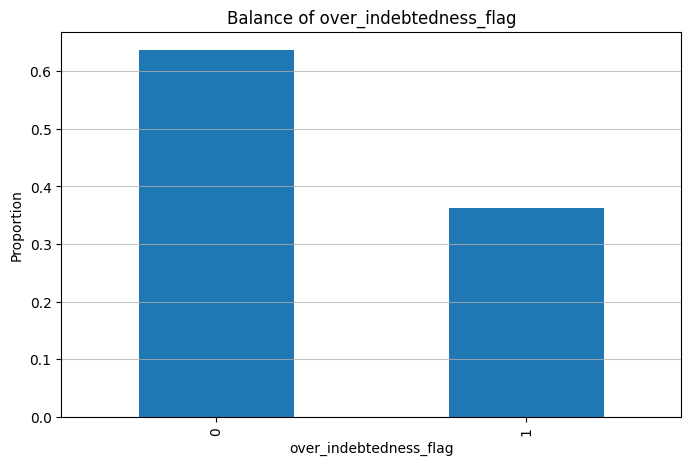

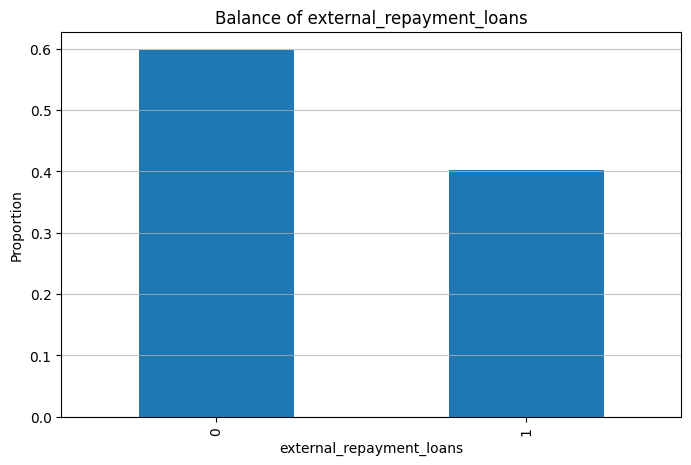

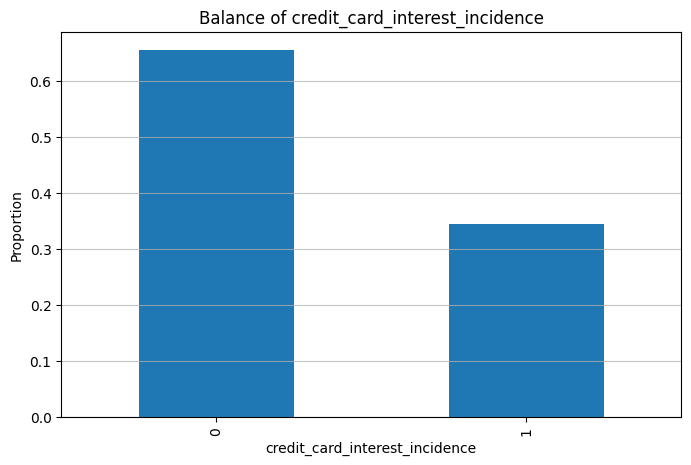

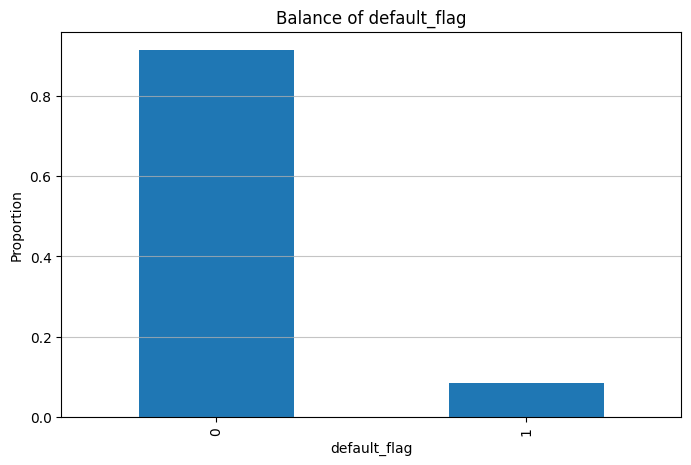

In [32]:
#check the balance of the binary columns
binary_cols = binary_col(data_scaled)
for column in binary_cols:
    balance = data_scaled[column].value_counts(normalize=True)
    print(f"Balance of {column}:\n", balance)
    plt.figure(figsize=(8, 5))
    balance.plot(kind='bar')
    plt.title(f'Balance of {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Balances\\{column}balance.png')

<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\2489516382.py:10: SyntaxWarning: invalid escape sequence '\C'
  plt.savefig('Plots\Correlation Matricies\correlation_matrix.png')


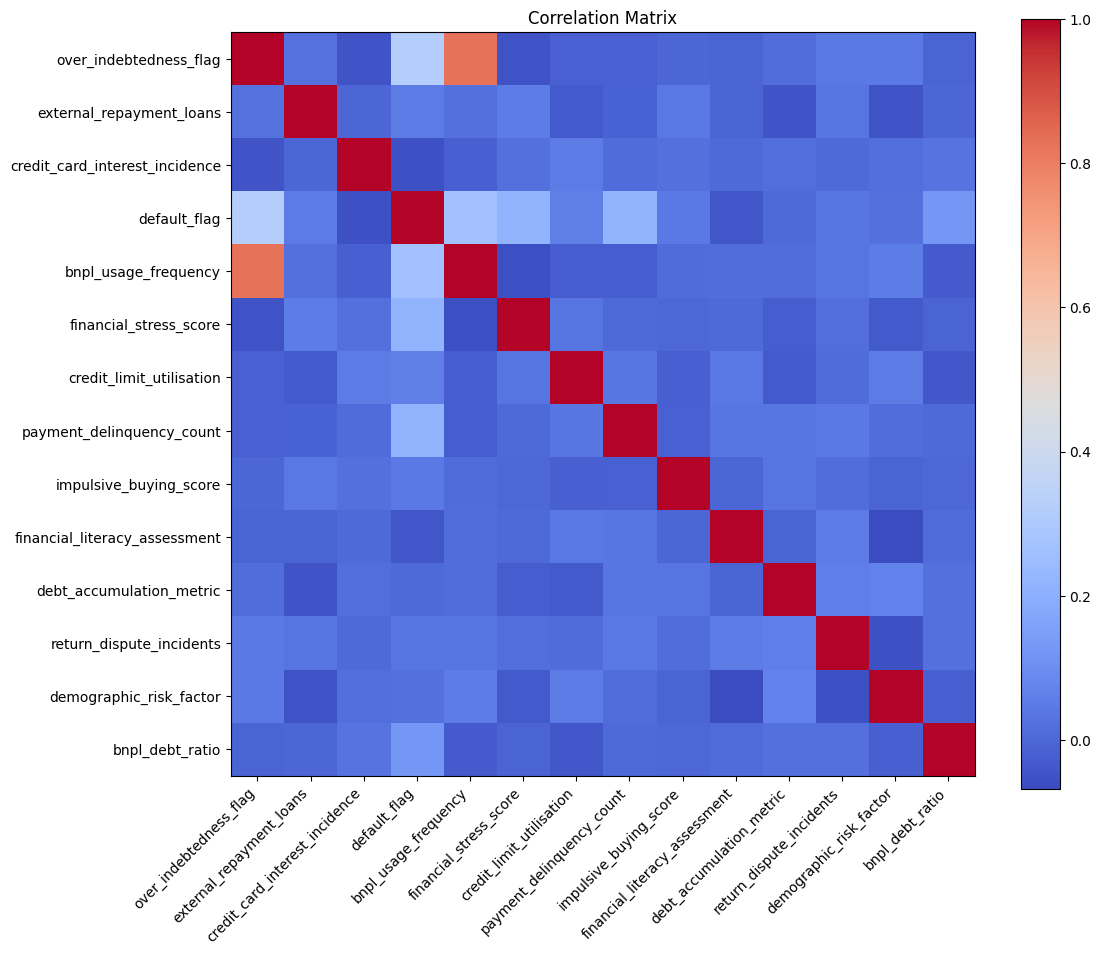

In [33]:
#get the correlation matrix
correlation_matrix = data_scaled.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled.columns)), labels=data_scaled.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled.columns)), labels=data_scaled.columns)
plt.savefig('Plots\Correlation Matricies\correlation_matrix.png')
plt.show()
plt.close()

<>:12: SyntaxWarning: invalid escape sequence '\B'
<>:12: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\4249115582.py:12: SyntaxWarning: invalid escape sequence '\B'
  plt.savefig(f'Plots\Boxplots\\{column}_boxplot_by_default_flag.png')


<Figure size 1000x600 with 0 Axes>

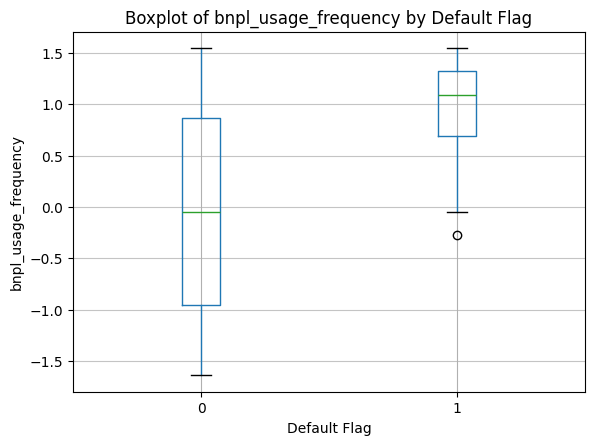

<Figure size 1000x600 with 0 Axes>

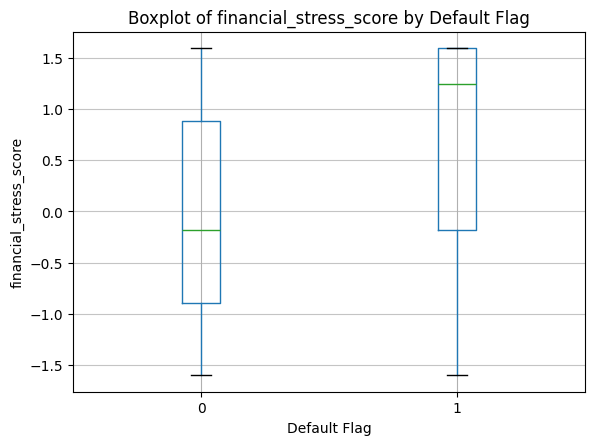

<Figure size 1000x600 with 0 Axes>

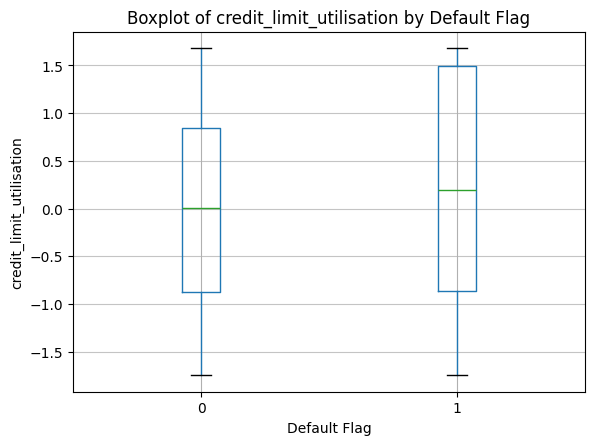

<Figure size 1000x600 with 0 Axes>

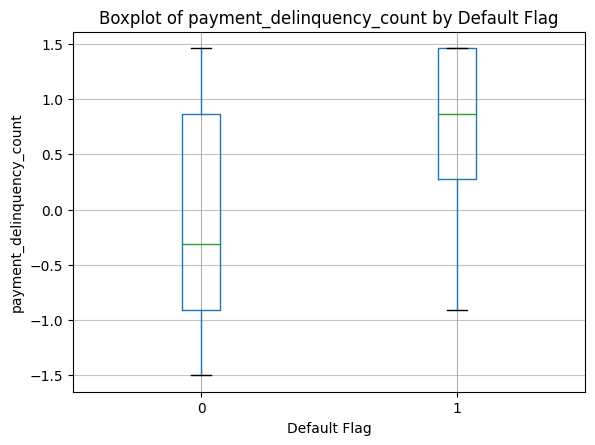

<Figure size 1000x600 with 0 Axes>

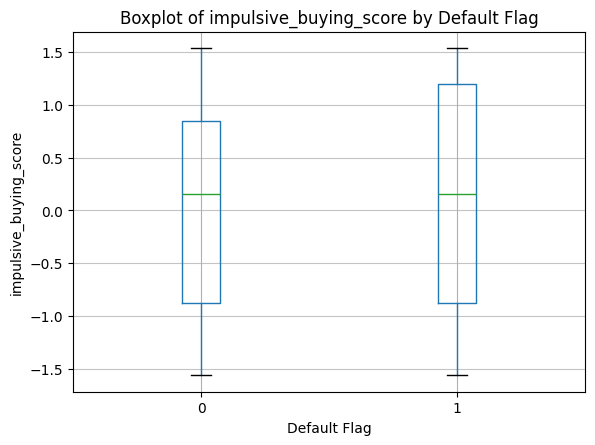

<Figure size 1000x600 with 0 Axes>

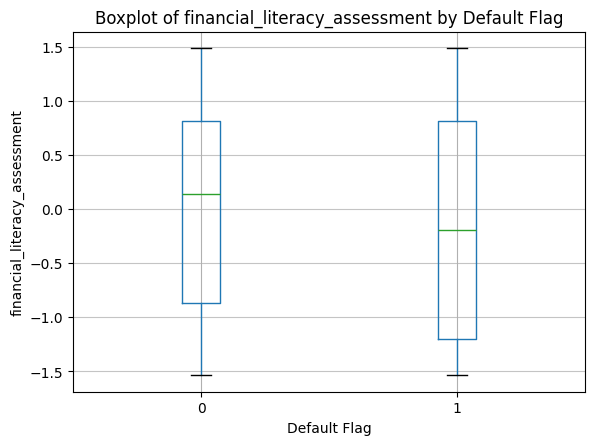

<Figure size 1000x600 with 0 Axes>

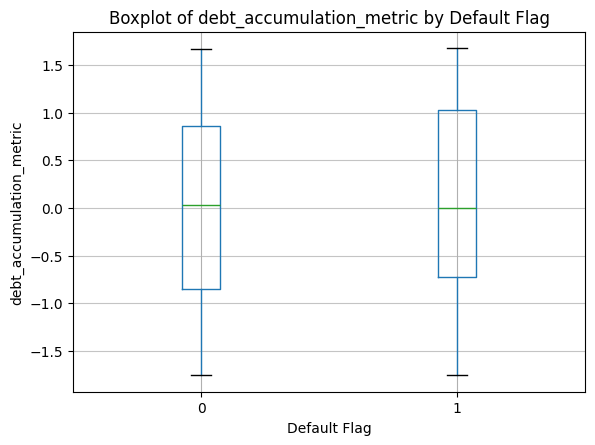

<Figure size 1000x600 with 0 Axes>

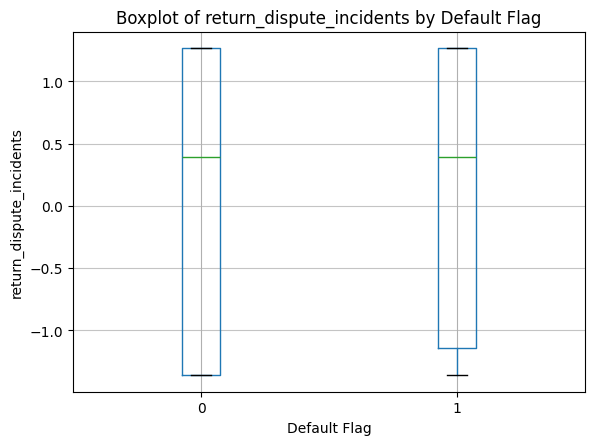

<Figure size 1000x600 with 0 Axes>

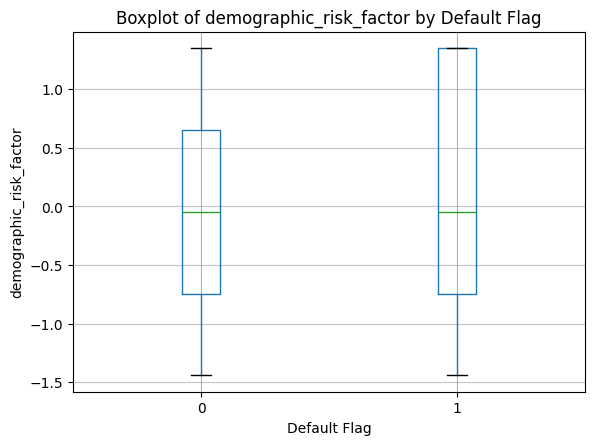

<Figure size 1000x600 with 0 Axes>

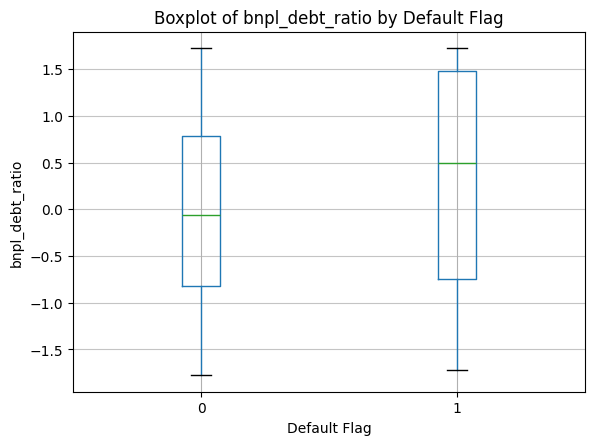

In [34]:
#plot 2 boxplots for each column one with default flag 0 and one with default flag 1
data_scaled_cleaned=pd.read_csv('Tables/bnpl_scaled_cleaned.csv', index_col=0)
continuous_cols = continuous_col(data_scaled_cleaned)
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    data_scaled_cleaned.boxplot(column=column, by='default_flag')
    plt.title(f'Boxplot of {column} by Default Flag')
    plt.suptitle('')
    plt.xlabel('Default Flag')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(f'Plots\Boxplots\\{column}_boxplot_by_default_flag.png')

<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\1015698981.py:10: SyntaxWarning: invalid escape sequence '\C'
  plt.savefig('Plots\Correlation Matricies\correlation_matrix_cleaned.png')


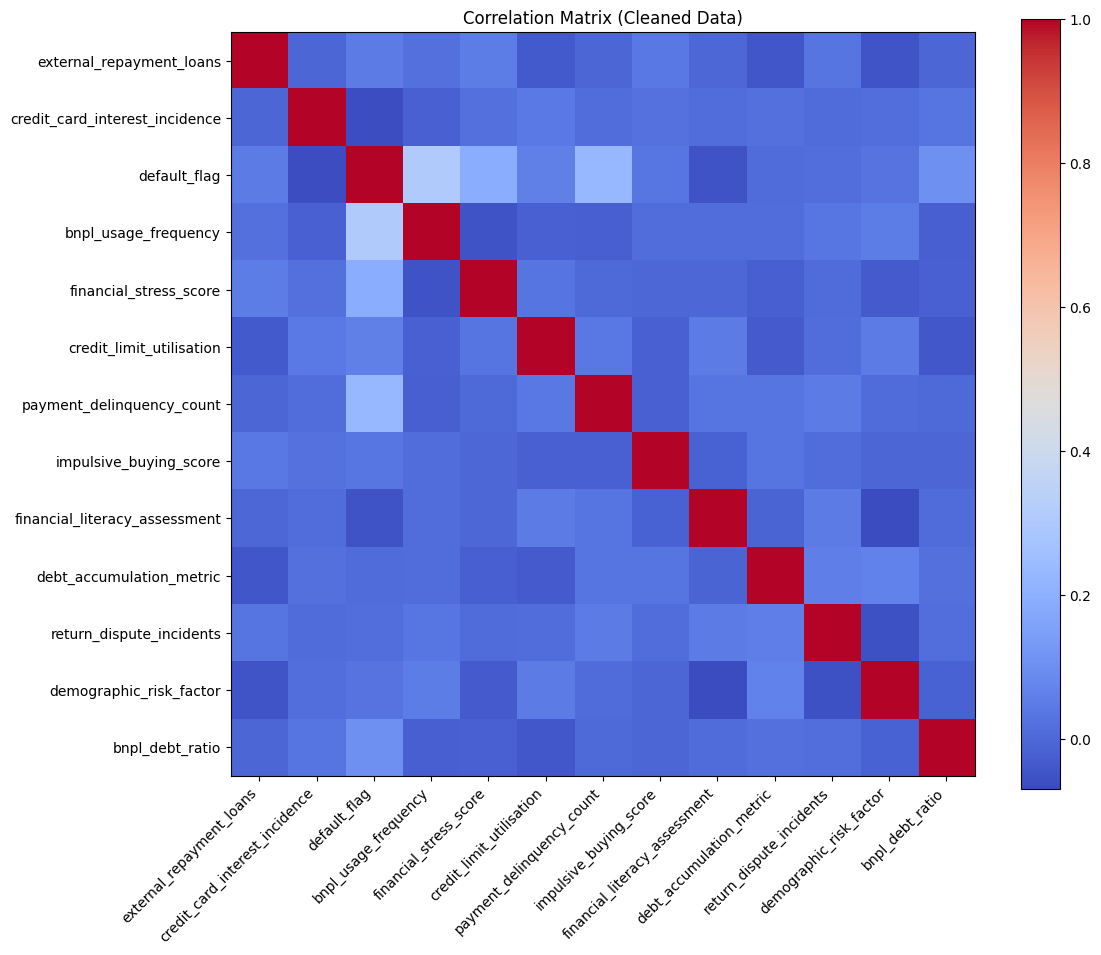

In [35]:
#plot the correlation matrix again after removing outliers
correlation_matrix_cleaned = data_scaled_cleaned.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_cleaned, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix (Cleaned Data)')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns)
plt.savefig('Plots\Correlation Matricies\correlation_matrix_cleaned.png')
plt.show()
plt.close()




<>:12: SyntaxWarning: invalid escape sequence '\B'
<>:12: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\418329009.py:12: SyntaxWarning: invalid escape sequence '\B'
  plt.savefig(f'Plots\Balances\\{column}_balance_cleaned.png')


Balance of external_repayment_loans after cleaning:
 external_repayment_loans
0    0.598187
1    0.401813
Name: proportion, dtype: float64


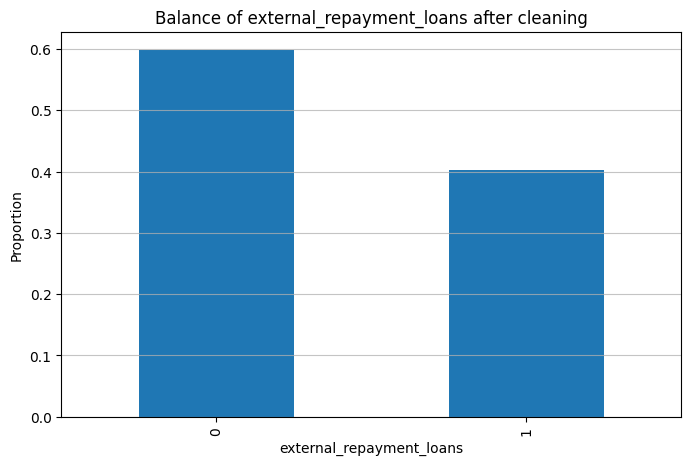

Balance of credit_card_interest_incidence after cleaning:
 credit_card_interest_incidence
0    0.656596
1    0.343404
Name: proportion, dtype: float64


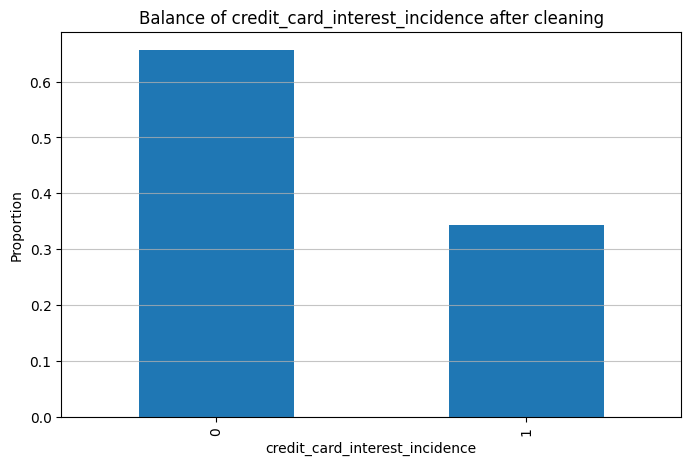

Balance of default_flag after cleaning:
 default_flag
0    0.92145
1    0.07855
Name: proportion, dtype: float64


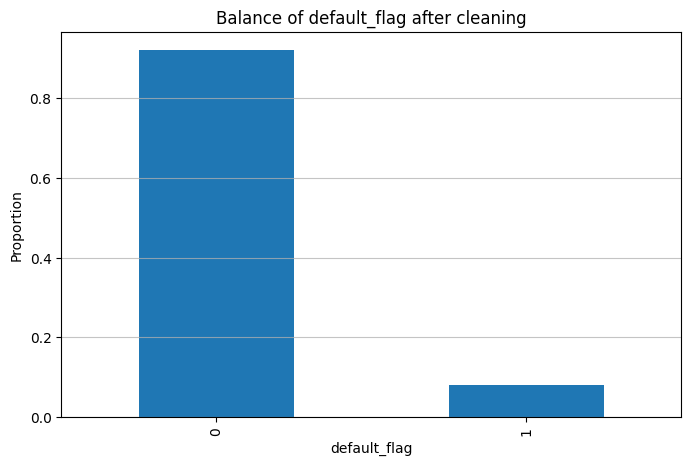

In [36]:
#check the balance of the binary columns again after removing outliers
binary_cols = binary_col(data_scaled_cleaned)
for column in binary_cols:
    balance = data_scaled_cleaned[column].value_counts(normalize=True)
    print(f"Balance of {column} after cleaning:\n", balance)
    plt.figure(figsize=(8, 5))
    balance.plot(kind='bar')
    plt.title(f'Balance of {column} after cleaning')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(f'Plots\Balances\\{column}_balance_cleaned.png')
    plt.show()

In [37]:
data_engineered = pd.read_csv('Tables/bnpl_engineered.csv', index_col=0)

<>:12: SyntaxWarning: invalid escape sequence '\B'
<>:12: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\2479984133.py:12: SyntaxWarning: invalid escape sequence '\B'
  plt.savefig('Plots\Boxplots\\{column}_boxplot_by_default_flag.png')


<Figure size 1000x600 with 0 Axes>

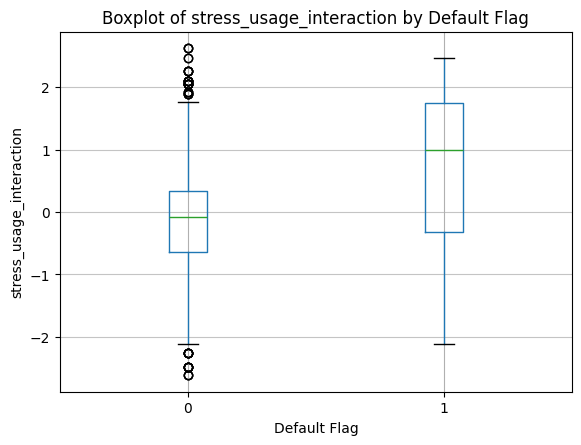

In [38]:

new_columns = [
    'stress_usage_interaction',
]
for column in new_columns:
    plt.figure(figsize=(10, 6))
    data_engineered.boxplot(column=column, by='default_flag')
    plt.title(f'Boxplot of {column} by Default Flag')
    plt.suptitle('')
    plt.xlabel('Default Flag')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Boxplots\\{column}_boxplot_by_default_flag.png')

<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ixz407\AppData\Local\Temp\ipykernel_18548\3061130124.py:11: SyntaxWarning: invalid escape sequence '\C'
  plt.savefig('Plots\Correlation Matricies\correlation_matrix_new.png')


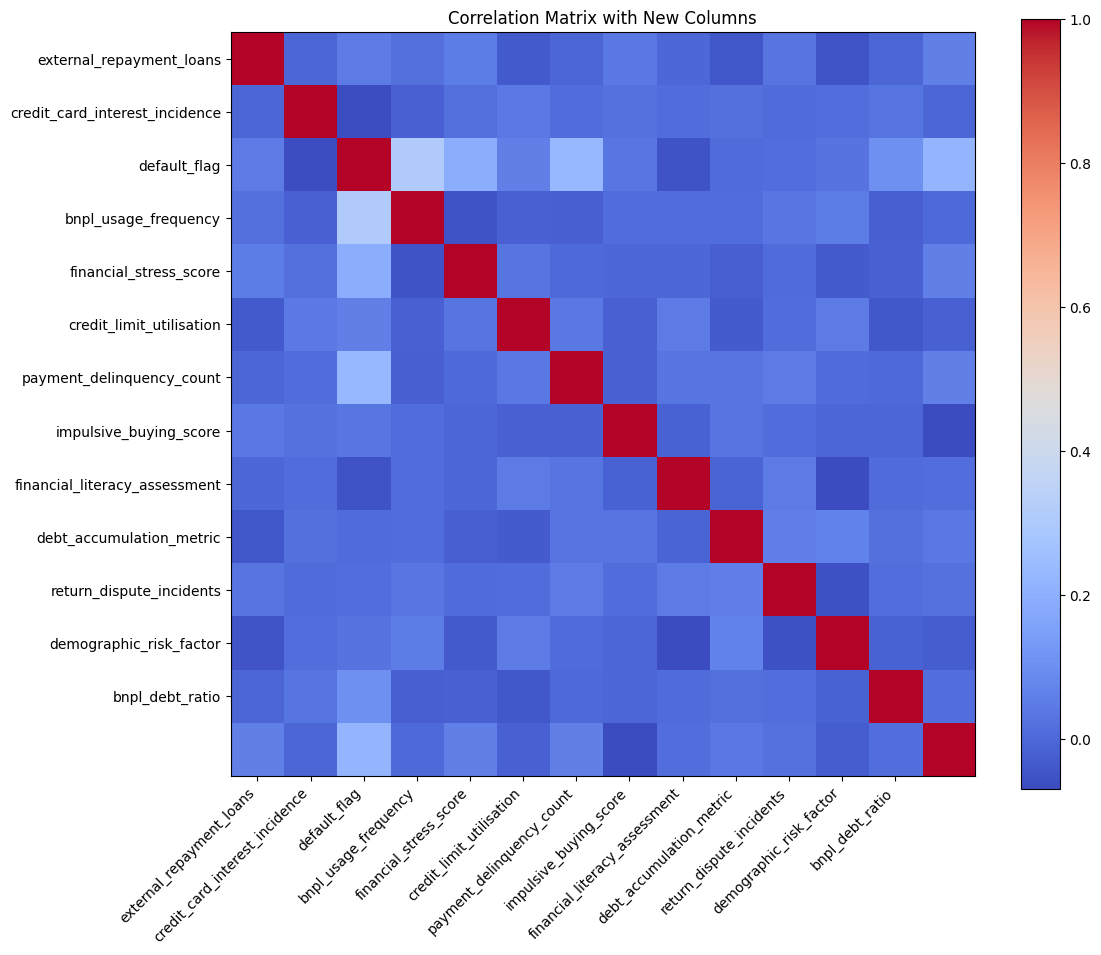

<Figure size 640x480 with 0 Axes>

In [39]:
#plot a new correlation matrix with the new columns
correlation_matrix_new = data_engineered.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_new, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix with New Columns')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns)
plt.show()
plt.savefig('Plots\Correlation Matricies\correlation_matrix_new.png')

In [40]:
# List of your result files
model_files = {
    "Logistic Regression": "Results/LR_model_results.json",
    "Random Forest": "Results/RF_model_results.json",
    "XGBoost": "Results/XGB_model_results.json",
    "SOM + Random Forest": "Results/SOM_RF_model_results.json",
    "SOM + XGBoost": "Results/SOM_XGB_model_results.json",
    "K-Means + Random Forest": "Results/K-Means_RF_model_results.json",
    "K-Means + XGBoost": "Results/K-Means_XGB_model_results.json"
}

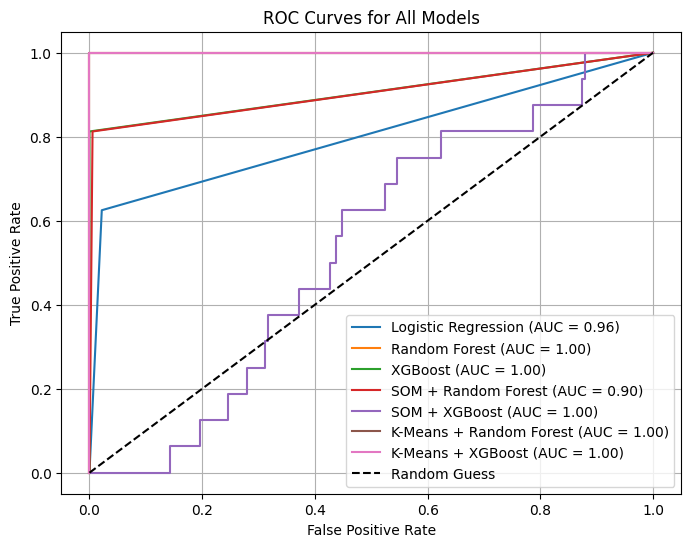

In [41]:
plt.figure(figsize=(8,6))

# Loop through models and plot ROC curves
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)
    
    fpr = results["fpr"]
    tpr = results["tpr"]
    auc = results["roc_auc"]
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plot baseline (random classifier)
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

# Format plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('Plots/roc_curves_all_models.png')
plt.show()

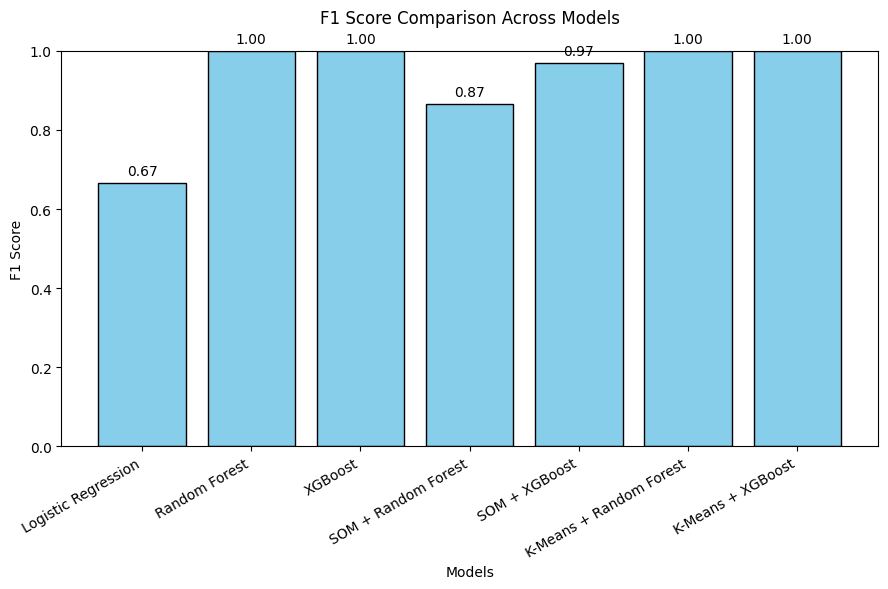

In [42]:
f1_scores = {}
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)
    f1_scores[model_name] = results["f1_score"]  # <-- check exact key name in JSON

# Plot
plt.figure(figsize=(9,6))
plt.bar(f1_scores.keys(), f1_scores.values(), color="skyblue", edgecolor="black")

plt.ylabel("F1 Score")
plt.xlabel("Models")
plt.title("F1 Score Comparison Across Models",pad=20)
plt.ylim(0, 1)  # scores between 0 and 1
plt.xticks(rotation=30, ha="right")

# Annotate values on top of bars
for i, (model, score) in enumerate(f1_scores.items()):
    plt.text(i, score + 0.02, f"{score:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.savefig('Plots/f1_scores_comparison.png')
plt.show()

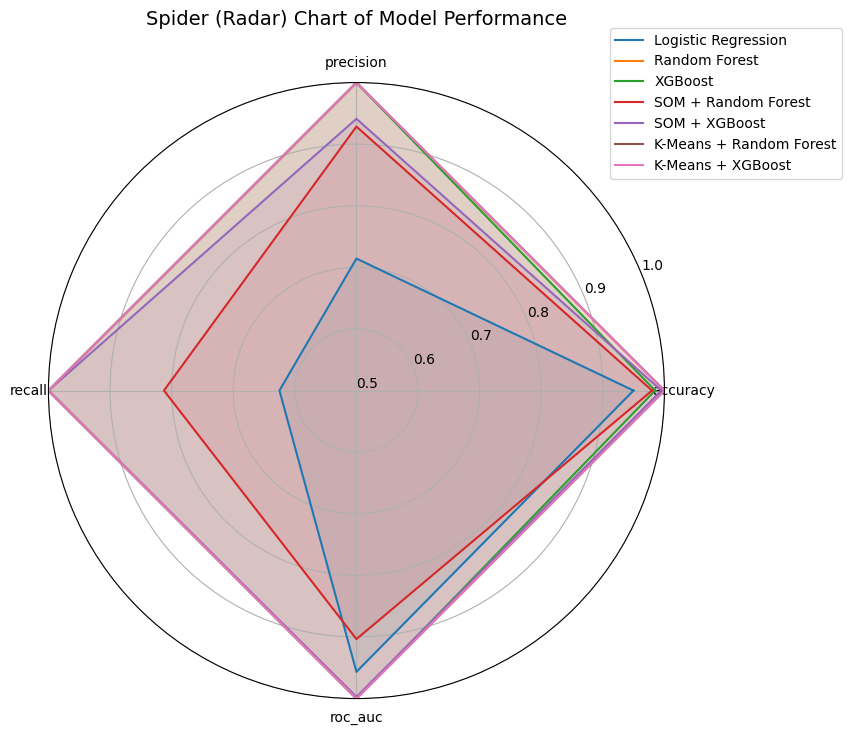

In [43]:
metrics = ["accuracy", "precision", "recall", "roc_auc"]
num_vars = len(metrics)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Loop through models
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)

    values = [results[m] for m in metrics]
    values += values[:1]  # close the circle

    ax.plot(angles, values, label=model_name)
    ax.fill(angles, values, alpha=0.1)

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # adjust based on your metrics scale
ax.set_ylim(0.5, 1.0)  # metrics are between 0 and 1

plt.title("Spider (Radar) Chart of Model Performance", size=14, y=1.08)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.savefig('Plots/spider_chart_model_performance.png')
plt.show()

In [44]:
with open("Results/LR_model_results.json", "r") as f:
    LR_results = json.load(f)
with open("Results/RF_model_results.json", "r") as f:
    RF_results = json.load(f)
with open("Results/XGB_model_results.json", "r") as f:
    XGB_results = json.load(f)
with open("Results/SOM_RF_model_results.json", "r") as f:
    SOM_RF_results = json.load(f)
with open("Results/SOM_XGB_model_results.json", "r") as f:
    SOM_XGB_results = json.load(f)
with open("Results/K-Means_RF_model_results.json", "r") as f:
    KMeans_RF_results = json.load(f)
with open("Results/K-Means_XGB_model_results.json", "r") as f:
    KMeans_XGB_results = json.load(f)

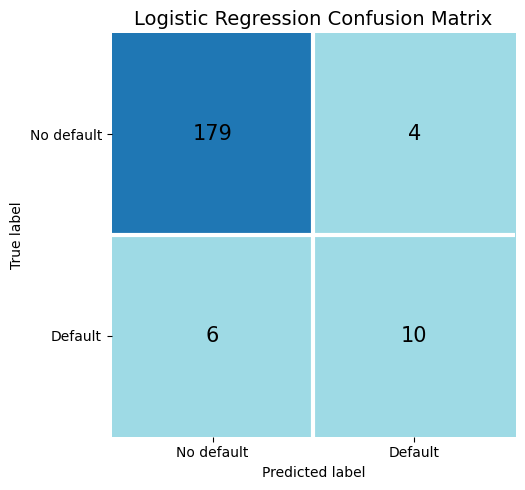

In [46]:
cm = np.array(LR_results["confusion_matrix"])
  # Assuming confusion matrix is stored in the results
# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No default', 'Default'])

# Plot with your custom settings
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

# Make the numbers bigger
for text in disp.text_.ravel():
    text.set_fontsize(15)
    text.set_color('black')

n_classes = cm.shape[0]
for i in range(1, n_classes):
    ax.axhline(i - 0.5, color='white', linewidth=3)
    ax.axvline(i - 0.5, color='white', linewidth=3)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/Logistic_Regression_cm.png", dpi=300, bbox_inches='tight')
plt.show()


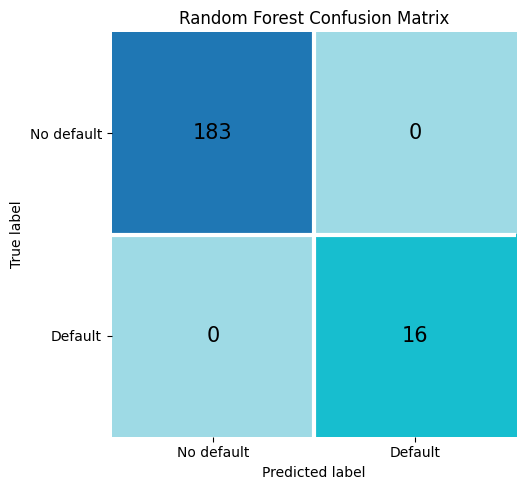

In [47]:

# Raw counts
cm = np.array(RF_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])

# Plot with custom settings
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

# Make the numbers bigger
for text in disp.text_.ravel():   # text_ stores the annotation objects
    text.set_fontsize(15)
    text.set_color('black')  # Set text color to black for better visibility
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  # horizontal line
    ax.axvline(i - 0.5, color='white', linewidth=3)  # vertical line
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/Random_Forest_cm.png")
plt.show()

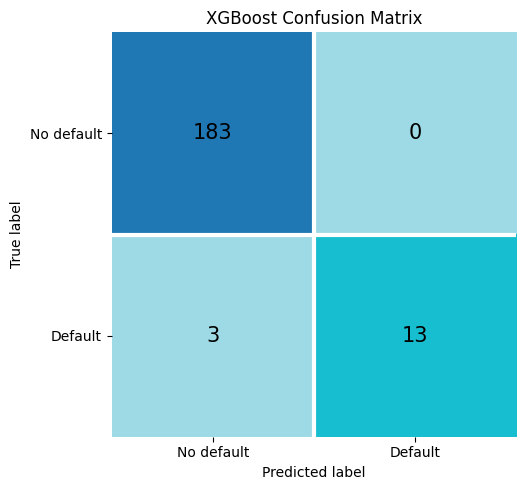

In [48]:

# Raw counts
cm = np.array(XGB_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])

# Plot with custom settings
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

# Make the numbers bigger
for text in disp.text_.ravel():   # text_ stores the annotation objects
    text.set_fontsize(15)
    text.set_color('black')  # Set text color to black for better visibility
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  # horizontal line
    ax.axvline(i - 0.5, color='white', linewidth=3)  # vertical line
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('XGBoost Confusion Matrix')
plt.savefig("Plots/Confusion Matricies/XGBoost_cm.png")
plt.tight_layout()
plt.show()

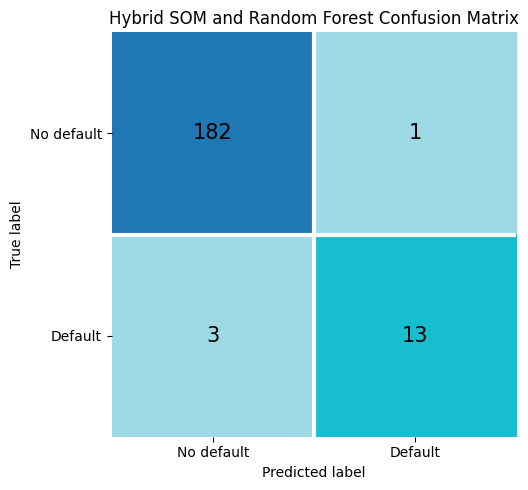

In [49]:

# Raw counts
cm = np.array(SOM_RF_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])
# Plot with custom settings
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

# Make the numbers bigger
for text in disp.text_.ravel():   # text_ stores the annotation objects
    text.set_fontsize(15)
    text.set_color('black')  # Set text color to black for better visibility
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  # horizontal line
    ax.axvline(i - 0.5, color='white', linewidth=3)  # vertical line
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Hybrid SOM and Random Forest Confusion Matrix')
plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/SOM+RF_cm.png")
plt.show()

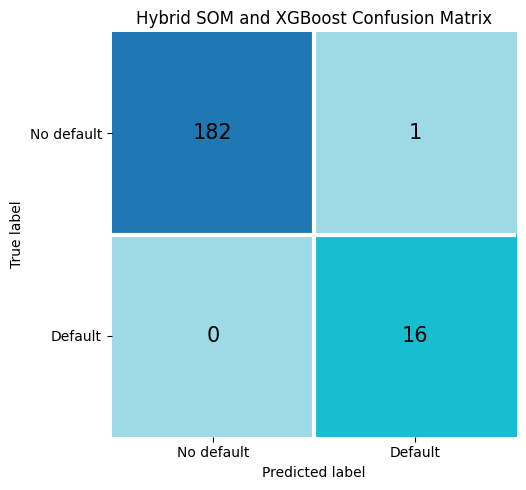

In [50]:


# Raw counts
cm = np.array(SOM_XGB_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])

# Plot with custom settings
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

# Make the numbers bigger
for text in disp.text_.ravel():   # text_ stores the annotation objects
    text.set_fontsize(15)
    text.set_color('black')  # Set text color to black for better visibility
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  # horizontal line
    ax.axvline(i - 0.5, color='white', linewidth=3)  # vertical line
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('Hybrid SOM and XGBoost Confusion Matrix')
plt.savefig("Plots/Confusion Matricies/SOM+XGB_cm.png")
plt.tight_layout()
plt.show()

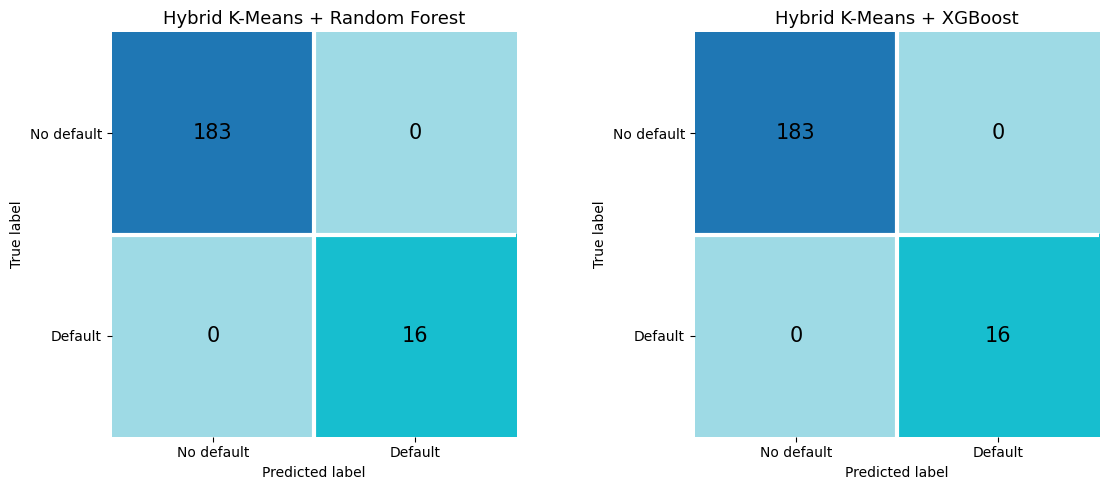

In [51]:

# Compute confusion matrices
cm_rf = np.array(KMeans_RF_results["confusion_matrix"])
cm_xgb = np.array(KMeans_XGB_results["confusion_matrix"])

# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Function to apply custom style
def plot_cm(cm, ax, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])
    disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=False)

    # Make the numbers bigger and black
    for text in disp.text_.ravel():
        text.set_fontsize(15)
        text.set_color('black')

    # Add white grid lines
    n_classes = cm.shape[0]
    for i in range(1, n_classes):
        ax.axhline(i - 0.5, color='white', linewidth=3)
        ax.axvline(i - 0.5, color='white', linewidth=3)

    # Remove outer border
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Set title
    ax.set_title(title, fontsize=13)

# Plot both matrices
plot_cm(cm_rf, axes[0], "Hybrid K-Means + Random Forest")
plot_cm(cm_xgb, axes[1], "Hybrid K-Means + XGBoost")

plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/K-Means_cm.png")
plt.show()
